In [1]:
import pandas as pd
import plotly.express as px
import json
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('dups_mapping.json', 'r') as f:
    dup_mapping = json.load(f)

In [3]:
dup_mapping = dup_mapping['dups_dict']

In [4]:
data = {}

In [5]:
for file in os.listdir('cleaned_pp_result'):
    if "json" not in file:
        continue

    with open(f'cleaned_pp_result/{file}', 'r') as f:
        questions = json.load(f)
        # print(questions['4'])
        for key, question in questions.items():
            data[key] = {"AnswerCount": question.get("AnswerCount", 0),
                         "CommentCount": question.get("CommentCount", 0),
                     "FavoriteCount": question.get("FavoriteCount",0),
                     "Score": question.get("Score", 0),
                     "ViewCount": question.get("ViewCount", 0),
                     "tags_list": question["tags_list"],}

In [165]:
view_list_dup = []
view_list_all = []
for key, question in data.items():
    if key in dup_mapping:
        view_list_dup.append(question['ViewCount'])
    view_list_all.append(question['ViewCount'])

In [166]:
view_list_dup = list(map(int, view_list_dup))
view_list_all = list(map(int, view_list_all))

In [167]:
min(view_list_dup), max(view_list_dup), min(view_list_all), max(view_list_all)

(5, 300238, 1, 1051784)

In [217]:
bins = np.linspace(5, 300238, num=1000)
res = np.take(bins,np.digitize(view_list_dup,bins,right=True))
print(index)
view_df_dup = pd.DataFrame(res, columns=['ViewCount'])

[1 1 1 ... 1 1 1]


In [218]:
bins = np.linspace(1, 1051784, num=1000)
res = np.take(bins,np.digitize(view_list_dup,bins,right=True))
view_df_all = pd.DataFrame(res, columns=['ViewCount'])

In [219]:
view_df_dup['ViewCount'] = view_df_dup[view_df_dup['ViewCount'] < 5000]
view_df_all['ViewCount'] = view_df_all[view_df_dup['ViewCount'] < 6000]

In [220]:
# view_df['Value'] = view_df['Value'].apply(lambda x: )

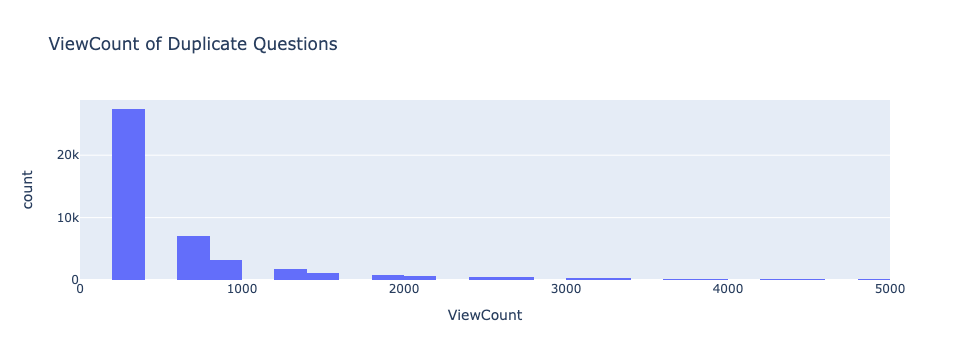

In [221]:
fig = px.histogram(view_df_dup, x="ViewCount", title="ViewCount of Duplicate Questions")
fig.show()

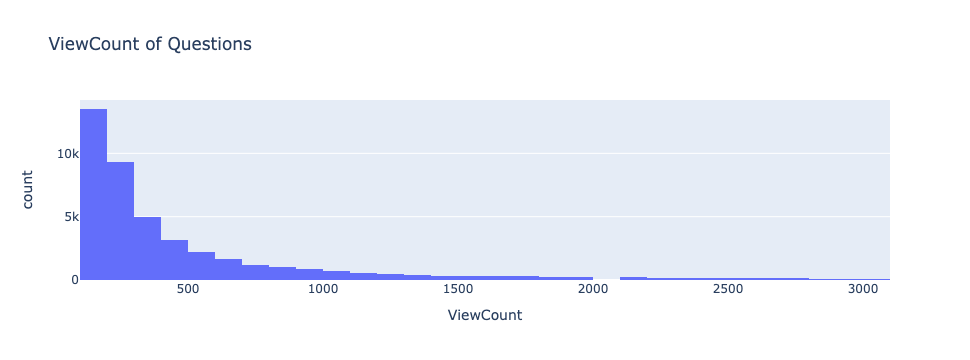

In [186]:
fig = px.histogram(view_df_all, x="ViewCount", title="ViewCount of Questions")
fig.show()

In [21]:
tags_list = {}
for key, question in data.items():
    # if key in dup_mapping:
    for tag in question['tags_list']:
        try:
            tags_list[tag]+=1
        except:
            tags_list[tag]=1

In [55]:
tags_df = pd.DataFrame(tags_list.items(), columns=['Tags', 'Value'])

In [56]:
tags_df.loc[tags_df['Value'] < 30000, 'Tags'] = 'Others'

In [57]:
tags_df.loc[tags_df['Tags'] == 'Others', 'Value'].sum()

6663270

In [58]:
tags_df = tags_df.groupby(tags_df['Tags']).aggregate('sum')

In [59]:
tags_df = tags_df.reset_index()

In [60]:
tags_df[tags_df['Tags'] == 'Others'] = 0

In [61]:
tags_df

Tags   Value
0            .net  124773
1               0       0
2            ajax   42631
3         android  210799
4          arrays   32763
5         asp.net  132156
6     asp.net-mvc   39333
7               c   65820
8              c#  333823
9             c++  139459
10            css   84293
11       database   38983
12         django   36155
13       facebook   30400
14           html  108311
15            ios   80350
16         iphone  143258
17           java  277652
18     javascript  241862
19         jquery  207102
20          linux   34987
21          mysql  109680
22    objective-c   94946
23            php  257277
24         python  122708
25          regex   40434
26           ruby   51086
27  ruby-on-rails   82342
28            sql   89496
29     sql-server   48691
30         vb.net   33209
31        windows   36071
32            wpf   49372
33          xcode   35419
34            xml   45742

In [62]:
tags_df.drop(tags_df.index[0], inplace=True)

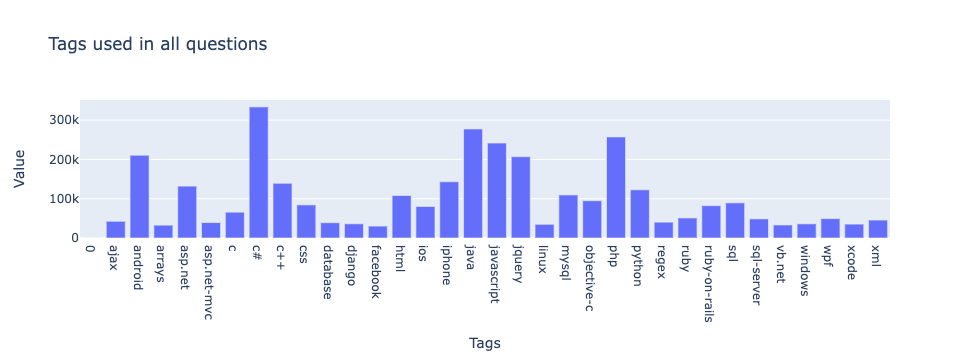

In [64]:
# fig = px.pie(tags_df, values='Value', names='Tags', title='Most popular tags')
fig = px.bar(tags_df, x="Tags", y="Value", title="Tags used in all questions")
fig.show()

In [31]:
fig = px.pie(tags_df, values='Value', names='Tags', title='Tags used in Duplicate questions')
fig.show()